# Библиотека Keras

Основные возможности:
* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей)
* Keras - удобный "пользовательский интерфейс" для более низкоуровневых библиотек (например, TensorFlow)

Основные принципы:
* Удобство использования
* Модульность
* Масштабируемость
* Работа с Python
* Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.

keras - одна из самых популярных библиотек для глубинного обучения (надстройка над другими библиотеками).

keras использует библиотеку tensorflow от Google, которая позволяет строить нейронные сети с высокой эффективностью и скоростью. Именно поэтому сейчас tensorflow - наиболее популярная библиотека для глубинного обучения.

Последовательность шагов:
1. Описать архитектуру сети
2. Описать входные значения
3. Описать условия обучения (Compilation)
4. Обучить (несколько раз?)
5. Оценить качество модели
6. Применить

# Нейросеть, классифицирующая изображения одежды

Процесс анализа данных:
* Загрузим данные для обучения и тестирования
* Предобработаем данные
* Создадим модель для обучения
* Обучим модель
* Протестируем модель

In [1]:
# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.3.1


### 1. Загрузка данных

In [4]:
# Загружаем датасет Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Массивы train_images и train_labels являются тренировочным сетом — данными, на которых модель будет обучаться.
# Модель тестируется на проверочном сете, а именно массивах test_images и test_labels.

In [6]:
# Изображения являются 28х28 массивами NumPy, где значение пикселей варьируется от 0 до 255. 
# Метки (labels) - это массив целых чисел от 0 до 9. Они соответствуют классам одежды изображенной на картинках:
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [7]:
# Каждому изображению соответствует единственная метка. 

#Так как названия классов не включены в датасет, сохраним их тут для дальнейшего использования при построении изображений:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
# в тренировочном сете 60,000 меток
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
train_labels[0]

9

In [13]:
# Проверочный сет содержит 10,000 изображений, каждое 28 на 28 пикселей
test_images.shape

(10000, 28, 28)

### 2. Подготовка данных 
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**

Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев.

Поэтому им нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от 0 до 1.

При этом каждый пиксель картинки представлен в виде целого числа от 0 до 255 (для черно-белых картинок) и в виде набора из трех целых чисел от 0 до 255 для цветных.

Поэтому нормализацию картинки можно произвести простым делением на 255.

Еще нейронной сети нужно значение выходной переменной в one-hot формате.

Напомним, что такое one-hot encoding.

Сейчас наша целевая переменная - цифры от 0 до 9, то есть 10 классов. Для каждой картинки наша сеть будет предсказывать вероятность принадлежности к каждому из этих десяти классов.

Соответственно, истинным значением целевой переменной будет вектор длины 10, состоящий из 0 с одной 1 на месте номера класса, к которому принадлежит картинка (то есть вероятность 1, что цифра на самом деле принадлежит к конкретному классу).

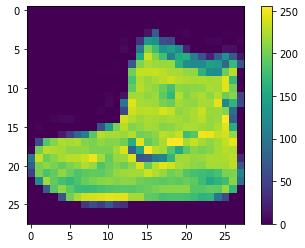

In [14]:
# Предобработка данных
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# масштабируем эти значения к диапазону от 0 до 1
train_images = train_images / 255.0
test_images = test_images / 255.0

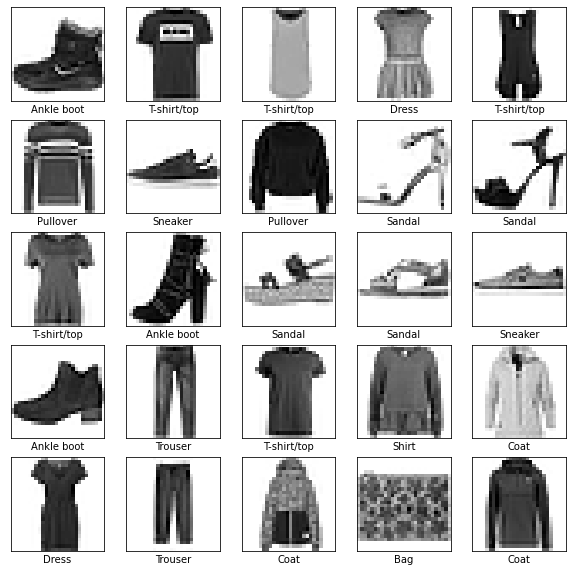

In [16]:
# проверим: выведем первые 25 элементов
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [17]:
# настроим слои
model = keras.Sequential([
    # преобразует формат изображения из двумерного массива (28 на 28 пикселей) 
    # в одномерный (размерностью 28 * 28 = 784 пикселя). Слой извлекает строки пикселей из изображения и выстраивает их в один ряд. 
    # Этот слой не имеет параметров для обучения; он только переформатирует данные
    keras.layers.Flatten(input_shape=(28, 28)),
    # После разложения пикселей, нейросеть содержит два слоя tf.keras.layers.Dense. Это полносвязные нейронные слои. 
    # Первый Dense слой состоит из 128 узлов (или нейронов). Второй (и последний) 10-узловой softmax слой возвращает 
    # массив из 10 вероятностных оценок дающих в сумме 1. Каждый узел содержит оценку указывающую вероятность принадлежности 
    # изображения к одному из 10 классов.
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Базовым строительным блоком нейронной сети является слой. Слои извлекают образы из данных, которые в них подаются.
# Большая часть глубокого обучения состоит из соединения в последовательность простых слоев. Большинство слоев, 
# таких как tf.keras.layers.Dense, имеют параметры, которые настраиваются во время обучения.

In [18]:
# compile модели
# После описания архитектуры необходимо скомпилировать модель при помощи метода compile, 
# указав минимизируемую функцию потерь (параметр loss), оптимизатор (параметр optimizer, который позаботится 
# об изменении весов модели) и метрику (параметр metrics), по которой будет оцениваться точность работы на тестовой выборке 
# в процессе обучения
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Функция потерь (Loss function) — измеряет точность модели во время обучения. 
# Мы хотим минимизировать эту функцию чтоб "направить" модель в верном направлении.

# Оптимизатор (Optimizer) — показывает каким образом обновляется модель на основе входных данных и функции потерь.

# Метрики (Metrics) — используются для мониторинга тренировки и тестирования модели. 
# Наш пример использует метрику accuracy равную доле правильно классифицированных изображений.

### Обучение нейросети

**Обучение** нейросети - изменение **весов** нейронов при помощи метода обратного распространения ошибки

### 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

Теперь задана структура модели и то, как мы будем ее обучать.
Обучаем ее аналогично `sklearn` - с помощью метода `fit`.

После запуска `fit` параметры оптимизируются градиентым спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40 
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке не стала убывать (то есть, не произошло переобучения). 

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [19]:
# обучение модели
model.fit(train_images, train_labels, epochs=10)

# Подайте тренировочный данные в модель. В этом примере тренировочные данные это массивы train_images и train_labels.
# Модель учится ассоциировать изображения с правильными классами.
# Мы просим модель сделать прогнозы для проверочных данных, в этом примере массив test_images. Мы проверяем, 
# соответствуют ли предсказанные классы меткам из массива test_labels.

# В процессе обучения модели отображаются метрики потери (loss) и точности (accuracy). 
# Эта модель достигает на тренировочных данных точности равной приблизительно 0.88 (88%).

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4971 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3367 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.2957 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.2793 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.2675 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 981us/step - loss: 0.2558 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2452 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - los

In [20]:
# Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 5. Валидация качества модели на тестовых данных.

In [21]:
# оценка точности
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 0s - loss: 0.3401 - accuracy: 0.8807

Точность на проверочных данных: 0.8806999921798706


Что это означает: для нашей модели на основе нейронной сети мы получаем точность 88% - то есть, с вероятностью 88% модель определяет, какая цифра нарисована на картинке

### 6. Дополнительно: Визуализация prediction

In [22]:
# сделать предсказания
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([1.1078463e-06, 6.0153509e-09, 1.6336891e-08, 4.6001222e-08,
       2.5193023e-09, 1.4872231e-02, 6.9797693e-08, 2.5314121e-02,
       1.8400778e-08, 9.5981240e-01], dtype=float32)

In [24]:
# Здесь полученная модель предсказала класс одежды для каждого изображения в проверочном датасете
# Прогноз представляет из себя массив из 10 чисел. Они описывают "уверенность" (confidence) модели в том, 
# насколько изображение соответствует каждому из 10 разных видов одежды.

In [25]:
# посмотрим, какой метке соответствует максимальное значение
np.argmax(predictions[0])

9

In [26]:
# Модель полагает, что на первой картинке изображен ботинок (ankle boot), или class_names[9]. 
# Проверка показывает, что классификация верна
test_labels[0]

9

In [27]:
# построим график, чтобы взглянуть на полный набор из 10 предсказаний классов
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

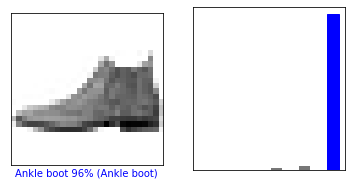

In [28]:
# посмотрим на нулевое изображение, предсказание и массив предсказаний 
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

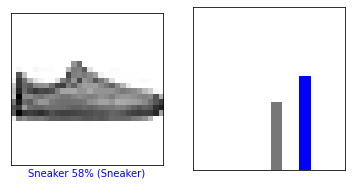

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

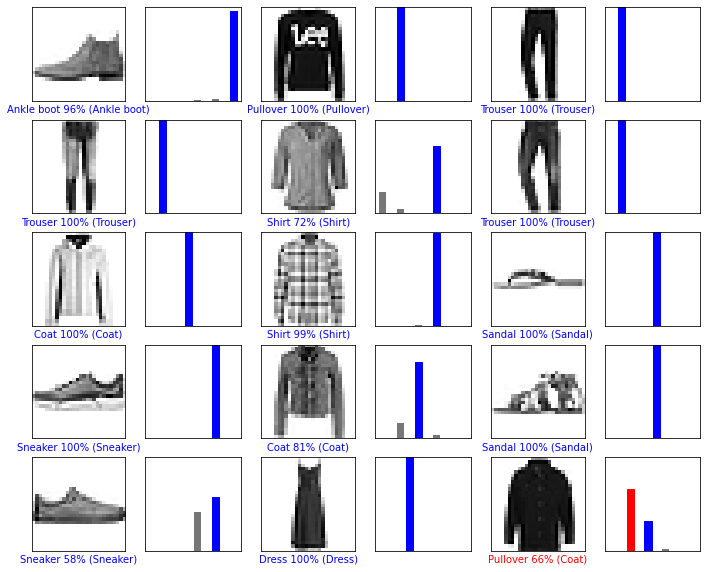

In [30]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [31]:
# Наконец, используем обученную модель для предсказания класса на одном изображении.

# Берем одну картинку из проверочного сета.
img = test_images[0]

print(img.shape)

(28, 28)


In [32]:
# Добавляем изображение в пакет данных, состоящий только из одного элемента.
img = (np.expand_dims(img,0))

print(img.shape)

# Модели tf.keras оптимизированы для предсказаний на пакетах (batch) данных, или на множестве примеров сразу. 
# Таким образом, даже если мы используем всего 1 картинку, нам все равно необходимо добавить ее в список

(1, 28, 28)


In [33]:
# Сейчас предскажем правильную метку для изображения
predictions_single = model.predict(img)

print(predictions_single)

[[1.1078463e-06 6.0153278e-09 1.6336861e-08 4.6001134e-08 2.5192879e-09
  1.4872224e-02 6.9797565e-08 2.5314132e-02 1.8400778e-08 9.5981240e-01]]


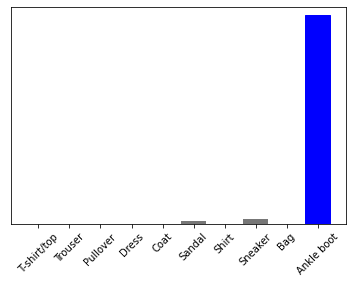

In [34]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [35]:
# Метод model.predict возвращает нам список списков, по одному для каждой картинки в пакете данных. 
# Получите прогнозы для нашего (единственного) изображения в пакете
np.argmax(predictions_single[0])

9

In [36]:
# И, как и ранее, модель предсказывает класс 9.